- title: course: (ML Series) Regression Approaches (Linear, Ridge, Lasso)
- date: 2020-10-03 12:00
- category: course
- tags: python, machine learning
- slug: regression_approaches
- authors: Julien Hernandez Lallement
- summary: A discussion of Regression algorithms
- illustration: 2020_10_linear_regression.jpg

## Regressions

### Introduction

Generally speaking, regression methods are supervised learning techniques. They use continous scaled variables (independent variables) to predict the behavior of a dependent variable. They can use different equations that will fit straight lines (linear regression), polynomial functions (detecting interaction effects) or other functions to predict the dependent variable.

In this post, I will be focusing on linear regressions in low and high dimensions. In a subsequent post, I will discuss logistic regression which is quite useful for classification problems (not a classification algorithm per se though, only if a probability threshold is set).

Note that part of this post is a copy of the introduction to machine learning post, which used linear regression as an illustrative example

### Use case

Regressions can be used in different scenarios:
* Classifying data based on continous scaled features (when the dependent variable is a categorical data, typically binary, i.e., 0 and 1)
* Capture numerical relationship between variables (is there any relation between the price of housing and the number of squared meters of the house?)

### Theoretical Background

Suppose that you obtain data for age and height of a bunch of people. You would be able to look at the linear relationship between the two. For a given person i, we can represent the age by X and the height by Y:

/home/julien/anaconda3/envs/data_blog/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


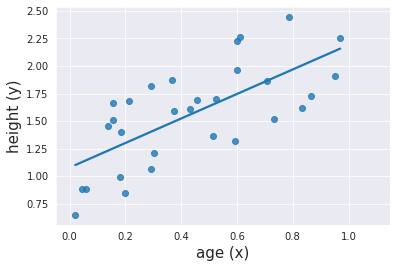

In [133]:
show_example()

We therefore want to find a relationship of the form:

\begin{equation*}
\left (y \right) = \left (w_0 + w_1 * x\right)
\end{equation*}

where $w$ are the parameters that we want to play with in order to obtain the best fit of the data.

You can then more variables to the model, which would become a multi-variate model:

$$ y(\mathbf{w}, \mathbf{x}) = w_0 + w_1 x_1 (+ w_2 x_2 + ...) $$


In some cases, a straight line will not have the best fit (this is something that you can test of course, but here a reasonable amount of common sense and more importantly **data visualization** will allow you to determine which model could fit best). In such cases, polynomial functions might allow you to get a better fit (see equation above).

Now, using this linear function, we want to measure how far away the actual data *`y`* is from the model. Question is, how do we define this line? How do we maximize the parameters so that the line captures the most variance in the data, maximizing the information we extract from each data point?

One could think of drawing many different lines, each better capturing a particular sub-population of the plotted data...

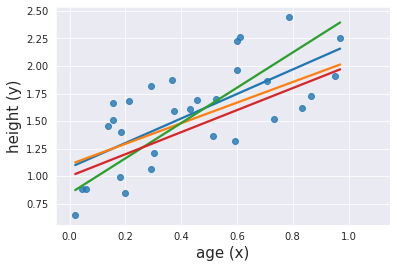

In [382]:
show_example(random_lines=3)

One way to capture a best fit for linear models is to use the `residuals`, which capture a measure of error between the actual data, and the plotted line.

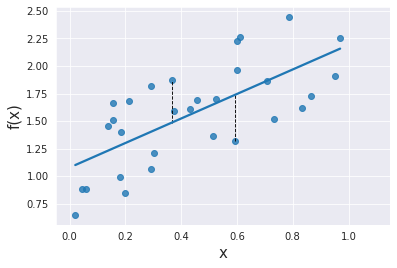

In [41]:
show_example(plot_errors=True)

The black dotted lines represent the difference between what your model would predict, and the real values of the target you are aiming at predicting. Reducing these errors is what you should aim for, without falling into the issue of over-fitting which I discuss a bit later. In other words, we want to minimize the `residuals`.

For example, let's take the Mean Squared Error (MSE; AKA Residual Sum of Squares) cost function:

$$
RSS : J(w) = \frac{1}{n}\sum \limits _{i=1} ^{n} [y_i - w_0 - \sum \limits _{j=1} ^{p} (w_j - x_ij)]^2
$$

Which you can write using the unwrapped equivalent of the $y$ function used above:

$$ J(\mathbf{w})  
 = \frac{1}{n}\sum_{i=1}^n(y_i-y(\mathbf{w}, \mathbf{x}^i))^2        $$
 

where: <br>
n = number of training examples<br>
*y(w,x^i)* = observed value<br>
$yi$ = predictions<br>
$w$ = parameter coefficient

This is basically a simple sum of the squares of the vertical distances between the real data points and the straight line of your model. <br>
The constant $\frac{1}{n}$ in front plays an important role for high sample sizes.

The MSE quantifies the average deviation of predicted values from the actual correct values. Conceptually, I can be explained in terms of model’s performance on the training set (the dataset fed to the data before assessing its generalization to unseen data). As you can see from the equation, the cost is larger when the model is performing poorly on this data set. <br> 

It is a popular choice given that:
* 1) it will be equal to 0 of the data is located in a perfect straight line
* 2) it has a one single minimum (as opposed to other cost functions which can have multiple local minima, and are more difficult to optimize). 

One objective of the algorithm you would be using is to minimize the cost (term `J` in the equation above), by testing different parameters.

Since you are looking for the lowest amount of error, an easy way to find the minimum analytically:

\begin{equation*}
\left (\sum \limits _{N} ^{n=1} x^n * (w_0 + w_1 * x^n - y^n)\right) = \left (0\right)
\end{equation*}

Which allows you to obtain both parameters $\theta_0$ & $\theta_1$

\begin{equation*}
\left (\theta_0 \right) = \left (\frac{(\sum y) * (\sum x^2) - (\sum x) * (\sum xy)}{N \sum X^2 - (\sum x)^2} \right)
\end{equation*}

\begin{equation*}
\left (\theta_1 \right) = \left (\frac{N(\sum xy) - (\sum x) * (\sum xy)}{N \sum X^2 - (\sum x)^2} \right)
\end{equation*}

#### Polynomial Regression

Sometimes, your data will be correlated, but the overall shape won't folow one of a straigt line. In such cases, one can fit a a polynomial regression, which will result in findind the coefficients of a polynomial of a specific degree `d` that best fits the data. As such, linear regressions are a type of polynomial regression where d=1.

Note that this is not bounded to Linear Regression. <br>
Note as well that the higher the number of degrees, the higher is the danger of overfitting. <br>
Below I will be using PolynomialFeatures from Sklearn as demonstration.

### Practical Demonstration

I will be using two different famous use cases: the ChickWeight & the Boston Housing datasets.

##### Chick Weight dataset

Below, I will use the regression approach on the famous Chick Weight dataset.

In [1]:
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
import os
os.chdir('/home/julien/website/datasets')

In [3]:
df = pd.read_csv('ChickWeight.csv')

In [4]:
df.head(10)

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,4,1,1
2,59,8,1,1
3,64,12,1,1
4,76,16,1,1
5,93,20,1,1
6,106,24,1,1
7,125,28,1,1
8,149,32,1,1
9,171,36,1,1


This dataset contains information about single chicks ("Chick" column), namely:
* Time (categorical): timestamp of the measure, in days
* Diet (categorical): informs which diet the chick was following
* Weight (continous): weight, in grams.

In [5]:
# Low case all column names
df.columns= [c.lower().replace(" ","") for c in df.columns]

In [6]:
def make_ml_data(dataf):
    return (dataf
            .dropna() # Just in case, drop NaNs
            .assign(weight_float = lambda d: d['weight'].astype(float))
            .assign(time_float = lambda d: d['time'].astype(float))
            .assign(diet_str = lambda d: d['diet'].astype(str))
            [['weight_float', 'time_float', 'diet_str']]          )

In [7]:
ml_df = df.pipe(make_ml_data)
ml_df.head(10)

,weight_float,time_float,diet_str
0,42.0,0.0,1
1,51.0,4.0,1
2,59.0,8.0,1
3,64.0,12.0,1
4,76.0,16.0,1
5,93.0,20.0,1
6,106.0,24.0,1
7,125.0,28.0,1
8,149.0,32.0,1
9,171.0,36.0,1


Above, I simply changed the format to be able to work with the data as numbers, and stored it in a new dataframe called `ml_df`.

Let's have a quick look at the data, per diet

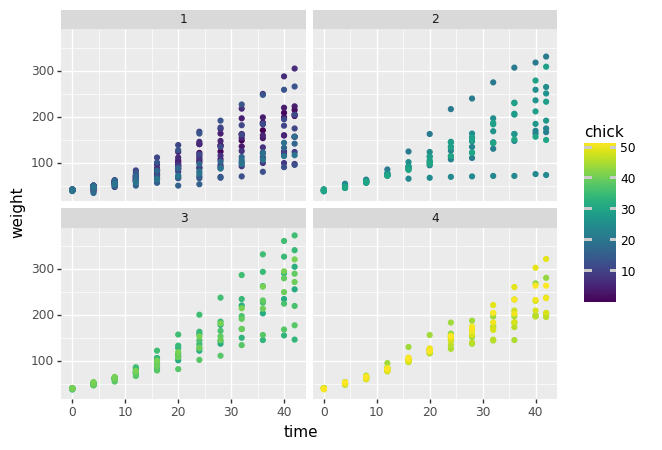

<ggplot: (8787642391189)>

In [8]:
(p9.ggplot() 
+ p9.geom_point(data=df, mapping=p9.aes("time", "weight", color="chick"))
+ p9.facet_wrap('diet')
)

There seems to be indeed a rather linear relation in each diet between `time` and `weight`. 

Now let's see if we can capture that using a regression approach.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

from sklego.preprocessing import ColumnSelector

I first will only use the `weight` to predict the age of the chick (`time`).

In [10]:
# Preprocessing pipeline
panda_grabber = Pipeline([
    ("union", FeatureUnion([
        ("continous", Pipeline([
            ("select", ColumnSelector(["weight_float"])),
            ("scale", StandardScaler())
        ]))
    ]))
])
# Fit and apply pipeline
panda_grabber.fit(ml_df,ml_df['diet_str']).transform(ml_df);

I define an ML pipeline. 

In [11]:
# ML pipeline
pipeline = Pipeline([
    ("grab", panda_grabber),
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("model", LinearRegression())
])

In [12]:
# Define parameters
param_poly = [PolynomialFeatures(interaction_only=True), 
              None]
# Define model to be used
param_model = [LinearRegression()]

# Define Grid Search approach
mod = GridSearchCV(pipeline,
                   #iid=True,
                   return_train_score=True,
                   param_grid={"model": param_model, 
                               "poly": param_poly},
                   cv=20)

In [13]:
# Fit model
mod.fit(ml_df, ml_df['time_float']);

In [14]:
mod_results = pd.DataFrame(mod.cv_results_)

In [15]:
mod_results[["mean_train_score","mean_test_score"]]

,mean_train_score,mean_test_score
0,0.701048,0.669315
1,0.701048,0.669315


Above, the results of the model fit. 

We have two lines since we provided two parameters to the model: polynomial fit, and no additional parameters. In this case, since we are using only one parameter, there is no difference between the scores of both models.

We have a good accuracy (~70%)in predicting the age of the chick based on the weight provided.

We also see that the accuracy is comparable between training and testing set, which suggest that we are not suffering from under or over fitting. 

Now let's try to add one additional feature to the model, the `diet`.

In [325]:
# Preprocessing pipeline
panda_grabber = Pipeline([
    ("union", FeatureUnion([
        ("continous", Pipeline([
            ("select", ColumnSelector(["weight_float"])),
            ("scale", StandardScaler())
        ])),
        ("coutinous", Pipeline([
            ("select", ColumnSelector(["diet_str"])),
            ("encode", OneHotEncoder(sparse=False))
        ]))
    ]))
])

# Fit and apply pipeline
panda_grabber.fit(ml_df,ml_df['time_float']).transform(ml_df);

# ML pipeline
pipeline = Pipeline([
    ("grab", panda_grabber),
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("model", LinearRegression())
])

In [326]:
# Define parameters
param_poly = [PolynomialFeatures(interaction_only=True), 
              None]
# Define model to be used
param_model = [LinearRegression()]

# Define Grid Search approach
mod = GridSearchCV(pipeline,
                   #iid=True,
                   return_train_score=True,
                   param_grid={"model": param_model, 
                               "poly": param_poly},
                   cv=20)

In [327]:
# Fit model
mod.fit(ml_df, ml_df['time_float']);

In [328]:
mod_results = pd.DataFrame(mod.cv_results_)

In [329]:
mod_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_poly,params,split0_test_score,split1_test_score,split2_test_score,...,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.005138,0.001651,0.002779,0.000804,"LinearRegression(copy_X=True, fit_intercept=Tr...","PolynomialFeatures(degree=2, include_bias=True...","{'model': LinearRegression(copy_X=True, fit_in...",0.898294,0.856007,0.626136,...,0.743154,0.747172,0.745816,0.733383,0.737239,0.738702,0.735355,0.738547,0.745687,0.009861
1,0.004310,0.000475,0.002454,0.000255,"LinearRegression(copy_X=True, fit_intercept=Tr...",None,"{'model': LinearRegression(copy_X=True, fit_in...",0.852402,0.820344,0.726365,...,0.727623,0.740840,0.730465,0.719738,0.723405,0.726095,0.722587,0.720838,0.731742,0.009894


We can see that now that we have added a novel feature to the model, the polynomial fit is different than the naive linear fit. <br>
We can also see that the accuracy is slightly better for the polynomial fit.

In [330]:
mod_results[["mean_train_score","mean_test_score"]]

,mean_train_score,mean_test_score
0,0.745687,0.678343
1,0.731742,0.689716


Adding the diet increases our accuracy by ~4%, which is not bad ;)

#### Testing the model with simulated data

I am creating 10000 data points taken from a uniform distribution.
Since we are trying to predict the age of the chick, I am drawing data for `weight`, and for demonstration purpose, I will simply use one diet type

In [378]:
n = 10000
simulated_df = pd.DataFrame({
    "weight_float": np.random.uniform(ml_df.weight_float.min(), ml_df.weight_float.max(), n),
    #"time_float": np.random.uniform(ml_df.time_float.min(), ml_df.time_float.max()+5, n),
    "diet_str": "1"
})
#simulated_df.time_float = simulated_df.time_float.round()

Now I can apply the model to this data to see what the predictions would be

In [ ]:
pltr = simulated_df.assign(pred = lambda d: mod.predict(d))

Finally, let's plot the real data and compare the age given for diet = 1 and different weight

In [380]:
# Assign some noise to the x_axis for better visualization
pltr = pltr.assign(x_axis = lambda d: d.diet_str.astype(float) + 0.5 + np.random.rand(n,1).flatten())

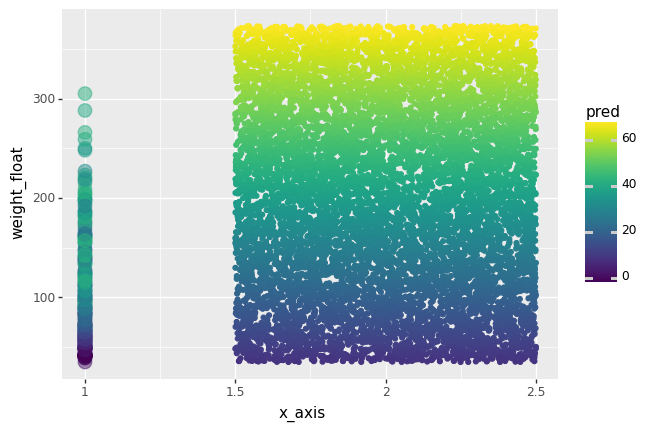

<ggplot: (8762044140481)>

In [377]:
(p9.ggplot() 
+ p9.geom_point(data=pltr,  mapping=p9.aes('x_axis', 'weight_float', color='pred')) 
+ p9.geom_point(data=df.loc[df.diet_str == '1'], mapping=p9.aes('diet', 'weight', color='time'), size=5, alpha=0.5)
)

Visually, we can see a common pattern between the real data one the left, and what the model predicted for the simulated data points on the right.

### Variations of naive linear models: Ridge & Lasso (AKA regularization)

In cases where the Linear Regression is over or under fitting the data, one can play with the cost function to control the way the coefficients are computed

Let's first look again at the cost function we defined previouly, the Residual Sum of Squares:

$$
RSS : J(w) = \frac{1}{n}\sum \limits _{i=1} ^{n} [y_i - w_0 - \sum \limits _{j=1} ^{p} (w_j - x_ij)]^2
$$

As discussed above, using this cost dunction will adjust the coefficients to fit the data best. Importantly, the fit will be done on the training dataset. Now, if there is noise in the training data, or it is of poor quality, then the estimated coefficients will cause the model to not generalize well to the future data (overfitting). This is where regularization can be useful since it will shrink or moduldate the learned estimates towards zero. In other wrods, regularization reduces the variance of the model, without substantial increasing its bias.

Ridge and Lasso regressions are variant of a naive linear model, that can help when we are suffering from over or under fitting

#### Ridge Regression

In a ridge regression, the cost function is modified by adding a penalty that will control for for multicolinearity. That penalty is equivalent to the square of the magnitude of the coefficients.

$$
Ridge : J(w) = \frac{1}{n}\sum \limits _{i=1} ^{n} [y_i - w_0 - \sum \limits _{j=1} ^{p} (w_j - x_ij)]^2 + \lambda \sum \limits _{j=1} ^{p} w^2_j
$$

Adding the regularization term forces the model to select simpler models to fit the data and since we omit the $w_0$ term in the regularization term, the larger the $w_j$, the greater will we see a change in the prediction.

$\lambda$ is the tuning parameter, that determines the level of penalty of our model. This is how the Ridge regression technique prevents coefficients from rising too high.

When $\lambda$ = 0, no penalty is applied, and the estimates will be equal to least squares (as in naive linear regression). However, as $\lambda$ increases, the penalty grows, and the ridge regression coeﬃcient estimates will approach 0. FYI, this is also known as the `L2 norm`.

Hence, the parameter $\lambda$ is critical for a good model fit (cross validation can be useful here). 

For one dimensional linear regression, regularization terms might not be extremely useful, but they become interesting for higher order polynomials, where the different features might influence the model in an uncontrolled manner. In that case, the regularization term will reduce the size of some coefficients, controlling for unwanted effect on the fit.

Below, I show the effect of the regularization on the coefficients. I will be using the boston housing dataset.

In [39]:
import os
os.chdir('/home/julien/website/datasets')
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('BostonHousing.csv')

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

Below, a function that will fit different levels of lambda using a Ridge Regression, and plot the coefficients for each feature

In [42]:
def run_regularizations(data, alpha, model):
    # Split data
    X_train,X_test,y_train,y_test=train_test_split(data.drop(columns={'medv'}),
                                                   data.medv,
                                                   test_size=0.3,
                                                   random_state=3
                                                  )
    # Plot parameters
    marker_size=10
    alpha=0.5
    colors = ['red', 'blue', 'green', 'cyan', 'black']
    markers = ['*', 'd','o', 'h', 's', 'p']
    pos = -1
    # Fit models
    for lambdas in alpha_levels:
        pos = pos + 1
        mod = model(alpha=lambdas)
        mod.fit(X_train, y_train)
        #print('**'+str(model)+(' ')+'alpha = '+str(lambdas)+'**')
        print('lambda level = ' +str(lambdas))
        #print('')
        print("Train Score: ", mod.score(X_train, y_train))
        print("Test Score: ", mod.score(X_test, y_test))
        print('')
        print('Number of feature used: ', np.sum(mod.coef_!=0))
        print('');print('')
        
        
        # Plot 
        plt.plot(mod.coef_,
                 alpha=alpha,
                 linestyle='none',
                 marker=markers[pos],
                 markersize=marker_size,
                 color=colors[pos],
                 label=[str(model) + str(lambdas)]
                ) 
    plt.xlabel('Feature',fontsize=16)
    plt.ylabel('Coefficient Magnitude',fontsize=16)
    plt.xticks(ticks = range(0,13),labels=data.columns[:-1],rotation=90)
    plt.legend(fontsize=13,
               bbox_to_anchor=(1.05, 1), 
               loc='upper left', 
               )
    plt.show()

I will test two different values of $\lambda$, which in Sklearn is referred to as `alpha`.

lambda level = 0.01
Train Score:  0.7419030253527293
Test Score:  0.7146125373123909

Number of feature used:  13


lambda level = 2
Train Score:  0.7395441089017241
Test Score:  0.7006795986760206

Number of feature used:  13


lambda level = 100
Train Score:  0.7172809669938278
Test Score:  0.6805765856921935

Number of feature used:  13




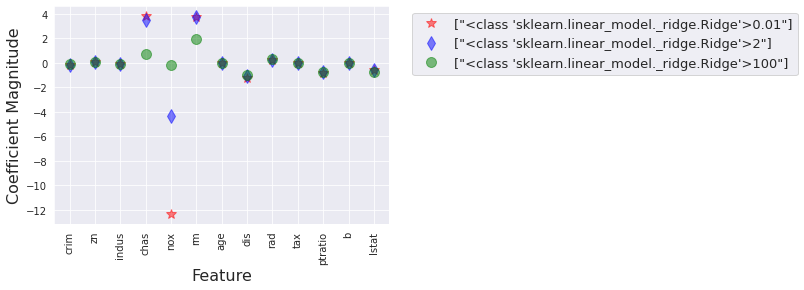

In [108]:
alpha_levels=[0.01,2,100]
run_regularizations(data=df, alpha=alpha_levels, model=Ridge)

Here, we can see how the coefficient level approaches 0 with increasing values of $\lambda$. Note that this plot is for demonstration purpose, since a naive Linear Regression already provides a good fit, and non regularization is needed on this dataset.

#### Important aspects of regularization

It should be noted that the Ridge Regression, due to the use of the `L2 norm`, will shrink the coefficients for least important predictors. However, and importantly, these coefficients will never be equal to 0, and all predictors will be kept in the model. 
However, the `L1 norm` used in the Lasso Regression will force some coeﬃcient to be equal to 0 when the  parameter $\lambda$ is suﬃciently large. 

Therefore, the Lasso Regression can also performs feature selection, which is a advantage over the Ridge Regression. This can be quite useful if one wants to reduce the number of features used by the model.

Mathematically, this aspect of Lasso Regressio is enabled by the shape of the cost function, which will cause some feature to vanish when the coefficient takes a certain value relative to the cost function of a linear regression. For more information, check this [book](https://www.decitre.fr/livres/the-elements-of-statistical-learning-9780387952840.html).

#### Lasso Regression

`Lasso Regression` (Least Absolute Shrinkage and Selection Operator) is another variation of naive linear regressions. Instead of squaring the coefficients, we take the absolute value, as shown below:

$$
Lasso : J(w) = \frac{1}{n}\sum \limits _{i=1} ^{n} [y_i - w_0 - \sum \limits _{j=1} ^{p} (w_j - x_ij)]^2 + \lambda \sum \limits _{j=1} ^{p} |w_j|
$$

This variation differs from a ridge regression in that it will penalize mainly high coefficients. FYI, this is known as the `L1 norm`.

Note that simimlarly as for the Ridge Regression, the $\lambda$ parameter is crucial in the Lasso Regression.

Let `s` be any value that can be taken by $\lambda$.

Altogether, *the Ridge Regression can be thought of as solving an equation, where summation of squares of coefficients is less than or equal to s, while the Lasso Regression can be thought of as an equation where summation of modulus of coefficients is less than or equal to s.* See [here](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a) for quote and more information on Ridge and Lasso.

In [24]:
from sklearn.linear_model import Lasso

Again, I will test two different values of $\lambda$.

In addition to the same code used for the Ridge Regression, I will be looking at the number of features selected by the Lasso Regression, depending on the value of $\lambda$.

In addition, I will be using a simple Linear Regression, as comparison.

lambda level = 0.1
Train Score:  0.7345141994809461
Test Score:  0.6944794936282604

Number of feature used:  12


lambda level = 2
Train Score:  0.6360589925225575
Test Score:  0.5689094925386643

Number of feature used:  8


lambda level = 5
Train Score:  0.5863456625970724
Test Score:  0.5194701073822635

Number of feature used:  5


lambda level = 30
Train Score:  0.29364942062861665
Test Score:  0.30130242930419937

Number of feature used:  4


lambda level = 100
Train Score:  0.22175771924133436
Test Score:  0.24781706709707008

Number of feature used:  2




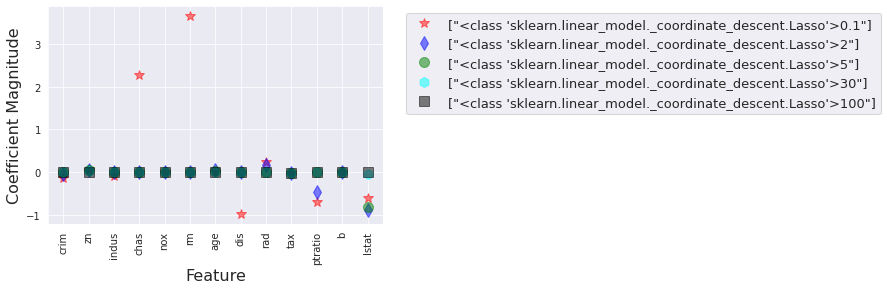

In [111]:
alpha_levels=[0.1,2,5,30,100]
run_regularizations(data=df, alpha=alpha_levels, model=Lasso)

Note how the coefficients are able to take a 0 value, hence resulting in a decreasing number of features used for an increasing value of $\lambda$.

This is selection feature performed by a Lasso Regression.

As for the Ridge Regression above, this plot is for demonstration purposes. I recommend using this algorithm on dataset with a higher number of features, since it might help to visualize the power of Lasso's feature selection inherent functions. He avoid to do here to no include too many different datasets.

### Pipeline for Regression

Since the Lasso and Ridge regression do not seem to add value, I will propose a pipeline using only Linear Regression.

#### Boston Housing dataset

In [43]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
zn,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
indus,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
chas,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
nox,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
rm,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
age,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
dis,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
rad,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
tax,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


Based on the correlation coefficient, I will be working with `lstat`, `tax`, `rm` & `ptratio` in the model.

In [44]:
# Preprocessing pipeline
panda_grabber = Pipeline([
        ("continous", Pipeline([
            ("select", ColumnSelector(["rm","tax","ptratio","lstat"])),
            ("scale", StandardScaler())
        ]))
])

# ML pipeline
pipeline = Pipeline([
    ("grab", panda_grabber),
    ("poly", PolynomialFeatures()),
    ("model", LinearRegression())
])

In [45]:
# Define parameters
param_poly = [PolynomialFeatures(degree = 2,interaction_only=True)]
# Define model to be used
param_model = [LinearRegression()
              ]

# Define Grid Search approach
mod = GridSearchCV(pipeline,
                   #iid=True,
                   return_train_score=True,
                   param_grid={"model": param_model, 
                               "poly": param_poly},
                   cv=5)

In [46]:
# Fit model
mod.fit(df, df['medv']);

In [47]:
# Show results
mod_results = pd.DataFrame(mod.cv_results_)
mod_results[["param_model", "param_poly","mean_train_score","mean_test_score"]]

,param_model,param_poly,mean_train_score,mean_test_score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...","PolynomialFeatures(degree=2, include_bias=True...",0.826054,0.534894


We can see a high accuracy on the training set, but 20% less accuracy on the training dataset. Interestingly, fitting the model **without** cross validation shows an increased model score on the test set. As discussed in my introductory posts on ML, scores obtained without cross-validation might not reflect the closest value to the true predictive power of the model.

Below the fiting without cross-validation

In [56]:
X = df.drop(columns={'medv'})
y = df.medv
# Scale data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

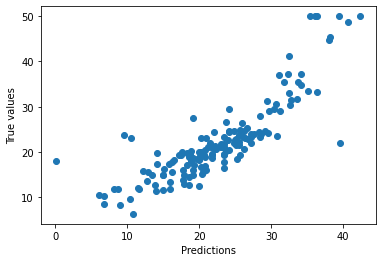

In [57]:
#Split data
X_train,X_test,y_train,y_test=train_test_split(scaled_X,
                                               y,
                                               test_size=0.3,
                                               random_state=3
                                              )
# Load model
lr = LinearRegression()
# Fit model
lr.fit(X_train,y_train)
# Show predictions vs true values
plt.scatter(x=(lr.predict(X_test)),y=y_test);
plt.xlabel('Predictions');
plt.ylabel('True values');

Let's look at each feature and how it influences the predicted value

In [58]:
lr.fit(scaled_X, y)
sorted(list(zip(X.columns, lr.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('lstat', -3.7436271264671097),
 ('dis', -3.104044258086443),
 ('rm', 2.6742301652393135),
 ('rad', 2.662217642473624),
 ('tax', -2.076781683843376),
 ('ptratio', -2.060606658906759),
 ('nox', -2.05671826600522),
 ('zn', 1.08156862782238),
 ('crim', -0.9281460643011978),
 ('b', 0.8492684177053316),
 ('chas', 0.6817397247777944),
 ('indus', 0.14089999690428334),
 ('age', 0.01946607165704607)]

The coefficients above represent the average **change** in the housing price for one unit of change in the feature while holding other features in the model constant. For example, holding all else constant, a unit increase in LSTAT decreases our target (housing price) by 3.469 and a unit increase in RM increases our target by 2.67.

Be careful though! We are looking at correlative data, so while looking at variables such as `rm` and `lstat` might be a good place to start, we cannot conclude that decreasing and increase `rm` and `lstat`, respectively, affects housing price.


#### Approaching Uncertainty

You will soon realize how important it will be to obtain confidence interval around your estimates. One way to do that is to use a **bootstrap.** I have already described this method in other [posts](https://juls-dotcom.github.io/permutation_1.html) related to permutation.

A bootstrap is a random sample with replacement of our data and this sample is of the same size of the original data. This is a way of generating multiple views of the same data. Let's create 1000 bootstraps of our data. This example is taken from [here](https://github.com/tfolkman).

In [68]:
from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(scaled_X, y)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)

Then on each of these datasets, we can fit our model and get our coefficents:

In [61]:
linear_regression_model = LinearRegression()
coeffs = []
for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)

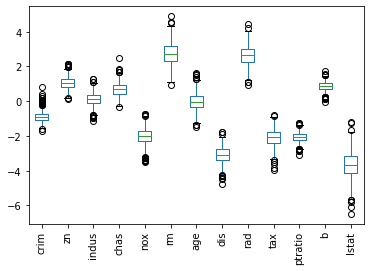

In [66]:
coef_df = pd.DataFrame(coeffs, columns=X.columns)
coef_df.plot(kind='box')
plt.xticks(rotation=90);

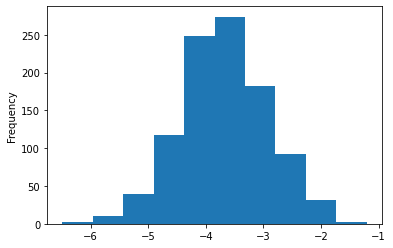

In [67]:
coef_df['lstat'].plot(kind='hist');

We can now say with confidence that the LSTAT coefficient is negative, and almost certaintly located between ~-1.2 and ~-5.5. 

To visualize an effect cross validation, we can plot a learning curve, that is the amount of error as a function of different volumne of data used for training

<module 'matplotlib.pyplot' from '/home/julien/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

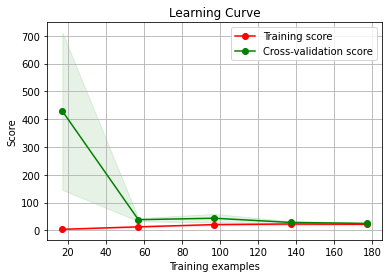

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
plot_learning_curve(lr, "Learning Curve", X_train, y_train, cv=2)

You can see that with less than 150 training examples, the training MSE is quite good and the cross-validation is quite bad. Without enough data, it is not possible to decide whether the problem comes from incomplete datasets or fitting problem.

As we increase our data size, both scores get closer, which suggests we don't have a high variance problem. Typically, with high variance this graph would have the two lines fairly far apart and looking like if we continued to add more data, they might converge. 

In [29]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Final notes

That was it for the linear regression. I hope you enjoyed it, don't hesitate in contacting me if you see any mistakes or have any question :)

Cheers!